<a href="https://colab.research.google.com/github/Maryamelias/DATA3421.Maryam/blob/main/Data_Understanding_and_Data_Preprocessing%2C_Maryam_HW1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Q1: Data Types and Summary**

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df = pd.read_csv("movie.csv")

In [ ]:
df.dtypes

Genre                object
Rotten Tomatoes       int64
IMDB                float64
Audience Ratings      int64
Budget_M            float64
Sales Revenue_M     float64
Year of Release      object
dtype: object

In [ ]:
df.describe()

,Rotten Tomatoes,IMDB,Audience Ratings,Budget_M,Sales Revenue_M
count,101.000000,101.000000,101.000000,101.000000,96.000000
mean,53.554455,5.562376,5272.663366,5456.333862,239.422768
std,33.764323,2.608864,2891.578546,25371.661518,156.248835
min,0.000000,1.100000,437.000000,3.274064,6.018111
25%,26.000000,3.300000,2711.000000,48.764034,118.330717
50%,52.000000,5.400000,5410.000000,92.511321,208.085811
75%,77.000000,7.700000,7734.000000,155.704105,379.441128
max,142.000000,9.900000,9882.000000,160159.381000,497.200395


In [ ]:
df.describe(include='object')

,Genre,Year of Release
count,101,101
unique,9,45
top,Action,1992
freq,16,6


In [ ]:
## This are the decriptive stats for the numerical column
df.describe()

,Rotten Tomatoes,IMDB,Audience Ratings,Budget_M,Sales Revenue_M
count,101.000000,101.000000,101.000000,101.000000,96.000000
mean,53.554455,5.562376,5272.663366,5456.333862,239.422768
std,33.764323,2.608864,2891.578546,25371.661518,156.248835
min,0.000000,1.100000,437.000000,3.274064,6.018111
25%,26.000000,3.300000,2711.000000,48.764034,118.330717
50%,52.000000,5.400000,5410.000000,92.511321,208.085811
75%,77.000000,7.700000,7734.000000,155.704105,379.441128
max,142.000000,9.900000,9882.000000,160159.381000,497.200395


In [ ]:
df['Year of Release'] = df['Year of Release'].str.extract('(\d+)').astype(float)

# **Q3: Distribution Analysis**

# **Q2: Descriptive Statistics**

Rotten Tomatoes
IMDB
Audience Ratings
Budget_M
Sales Revenue_M
Year of Release


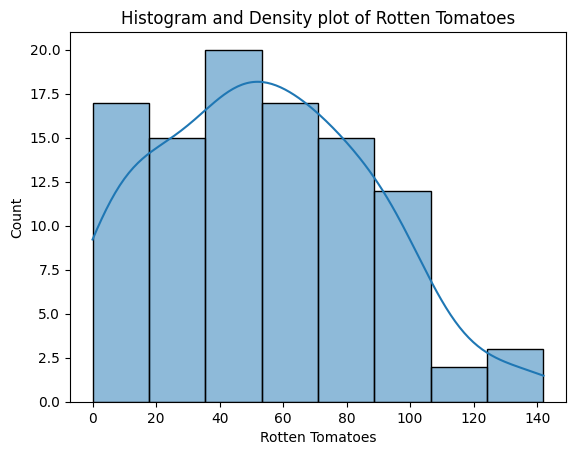

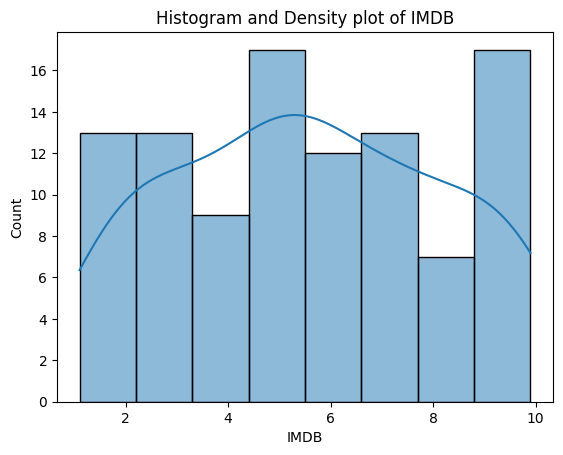

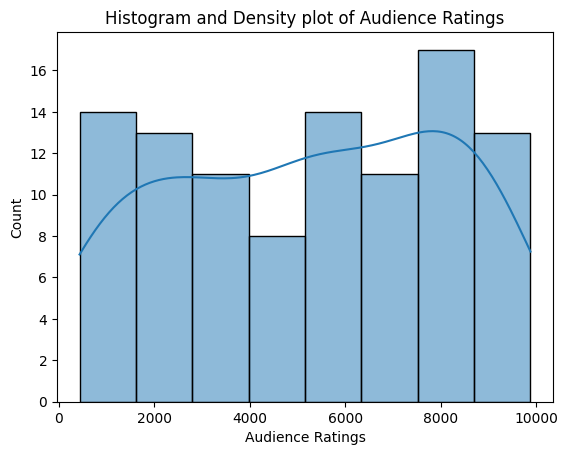

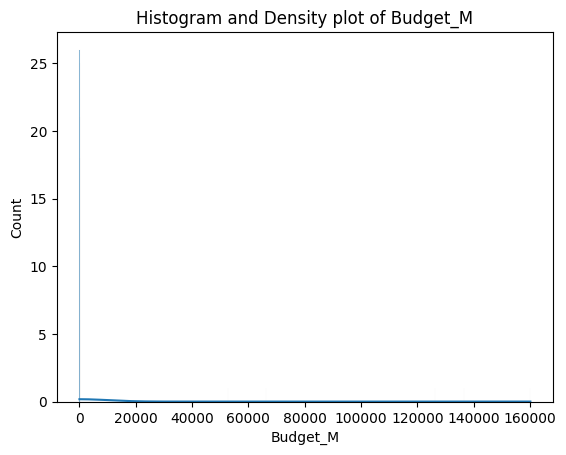

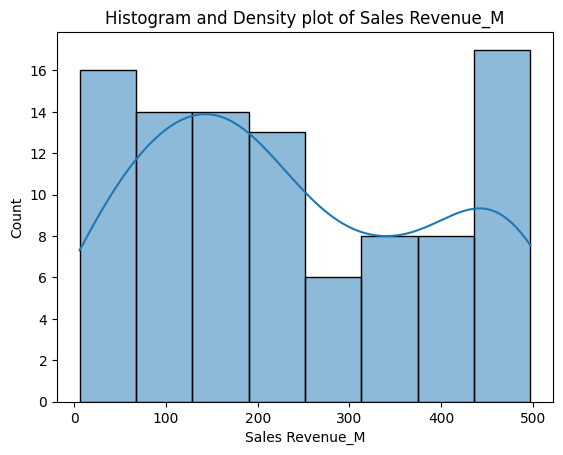

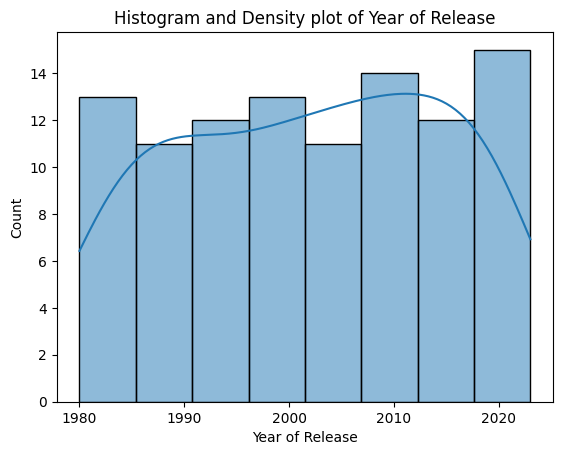

In [ ]:
### Q3: Distribution Analysis
## For numerical variables
for col in df.select_dtypes(include=['number']).columns:
  print(col)
  plt.figure()
  sns.histplot(df[col], kde=True)
  plt.title(f"Histogram and Density plot of {col}")
  plt.show

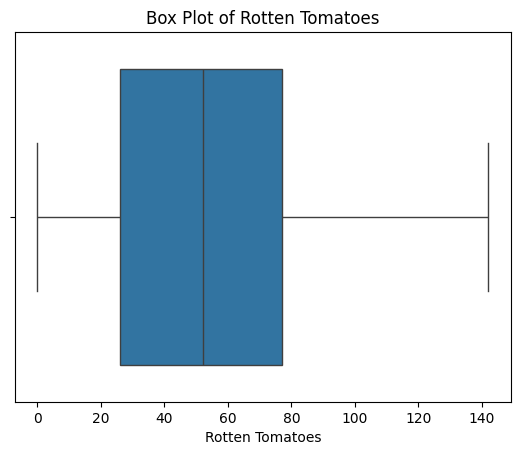

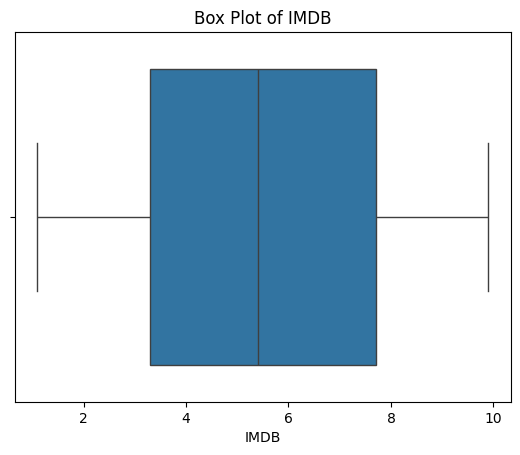

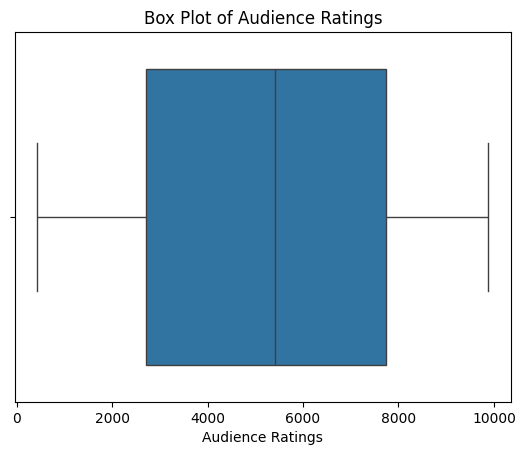

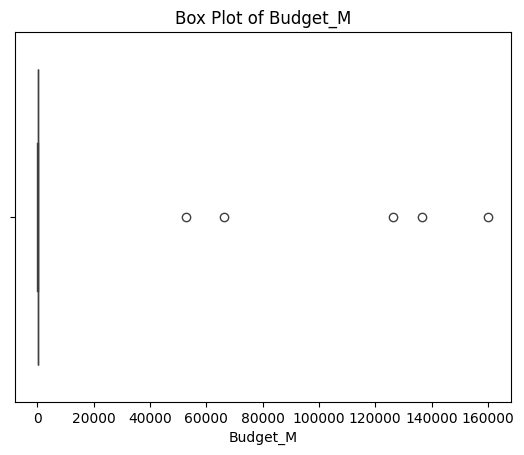

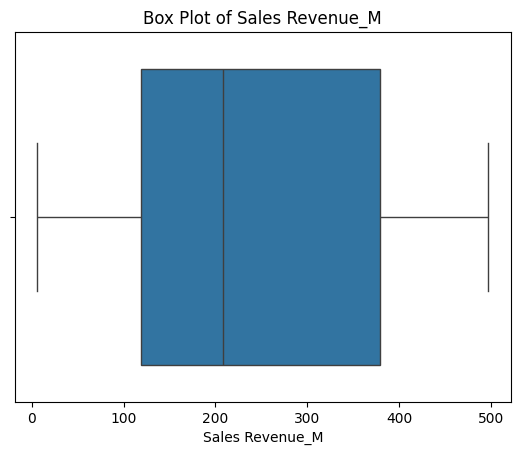

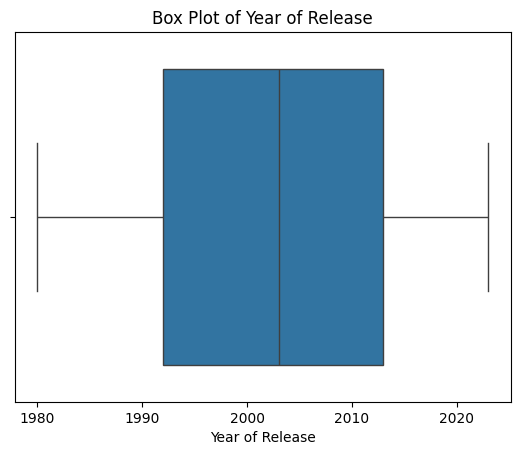

In [ ]:
## Boxplot
for col in df.select_dtypes(include=['number']).columns:
  plt.figure()
  sns.boxplot(x=df[col])
  plt.title(f"Box Plot of {col}")
  plt.show

In [ ]:
# Determine skewness
for col in df.select_dtypes(include=['number']).columns:
  skewness = df[col].skew()
  if skewness > 0:
        print(f"{col} exhibits right skewness.")
  elif skewness < 0:
    print(f"{col} exhibits left skewness.")
  else:
    print(f"{col} exhibits a normal distribution.")

Rotten Tomatoes exhibits right skewness.
IMDB exhibits right skewness.
Audience Ratings exhibits left skewness.
Budget_M exhibits right skewness.
Sales Revenue_M exhibits right skewness.
Year of Release exhibits left skewness.


# **Q4: Variability Analysis**

In [ ]:
df.std()

<ipython-input-86-ce97bb7eaef8>:1: FutureWarning: The default value of numeric_only in DataFrame.std is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.std()


Rotten Tomatoes        33.764323
IMDB                    2.608864
Audience Ratings     2891.578546
Budget_M            25371.661518
Sales Revenue_M       156.248835
Year of Release        12.784900
dtype: float64

In [ ]:
std_dev =df.select_dtypes(include=['number']).std()
var_highest = std_dev.idxmax()
print(f"The variable with the highest varibility is: {var_highest}")

The variable with the highest varibility is: Budget_M


# **Q5: Correlation Analysis**

In [ ]:
correlation_matrix=df.corr()
correlation_matrix

<ipython-input-88-8921cd126ae4>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix=df.corr()


,Rotten Tomatoes,IMDB,Audience Ratings,Budget_M,Sales Revenue_M,Year of Release
Rotten Tomatoes,1.000000,-0.010546,-0.126204,-0.051246,-0.122929,-0.001771
IMDB,-0.010546,1.000000,0.126555,-0.053704,-0.041741,-0.058463
Audience Ratings,-0.126204,0.126555,1.000000,-0.111453,-0.011118,-0.097656
Budget_M,-0.051246,-0.053704,-0.111453,1.000000,0.030309,0.154769
Sales Revenue_M,-0.122929,-0.041741,-0.011118,0.030309,1.000000,0.032820
Year of Release,-0.001771,-0.058463,-0.097656,0.154769,0.032820,1.000000


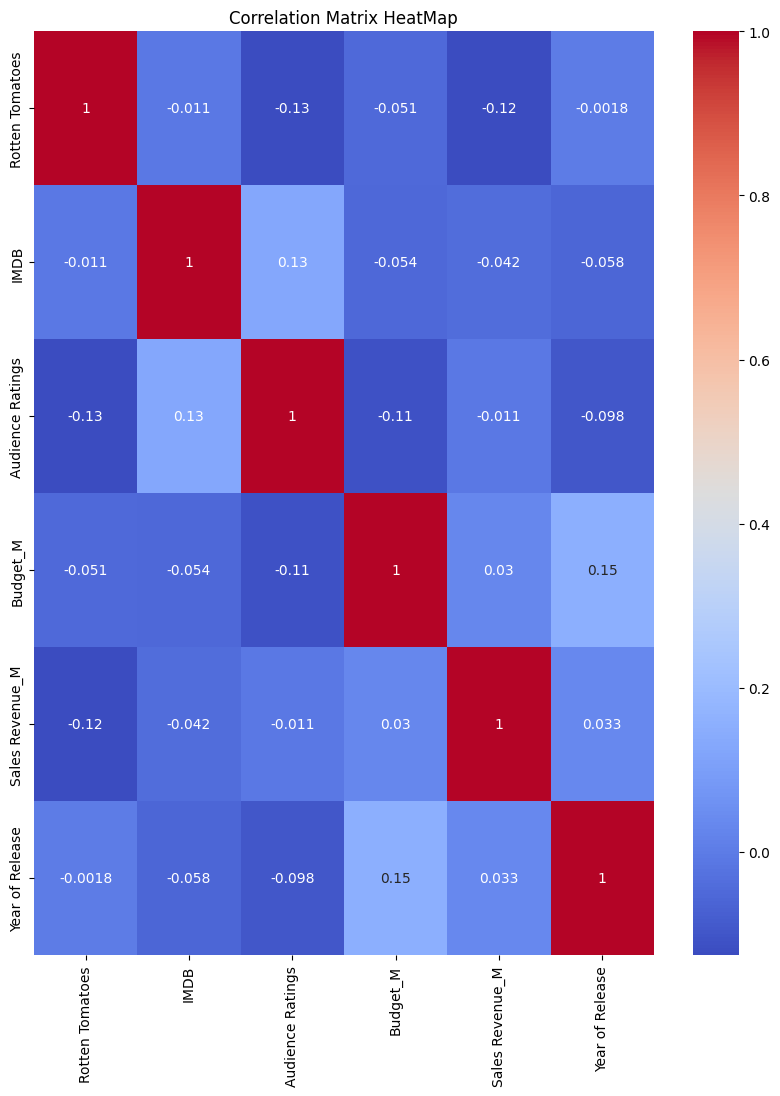

In [ ]:
plt.figure(figsize=(10,12))

sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix HeatMap')
plt.show()

# **Q6: Average Profit by Genre**

In [ ]:
### Genre with the Highest Sales Revenue
genre_sales= df.groupby('Genre')['Sales Revenue_M'].mean()

highestgenre_sales = genre_sales.idxmax()
max_avgrevenue= genre_sales.max()

print(f"The genre with the highest avg. sales revenue is {highestgenre_sales} with an avg. revenue of ${max_avgrevenue:.2f}")

The genre with the highest avg. sales revenue is Comedy with an avg. revenue of $274.68


# **Q7: Marketing Spend Analysis**

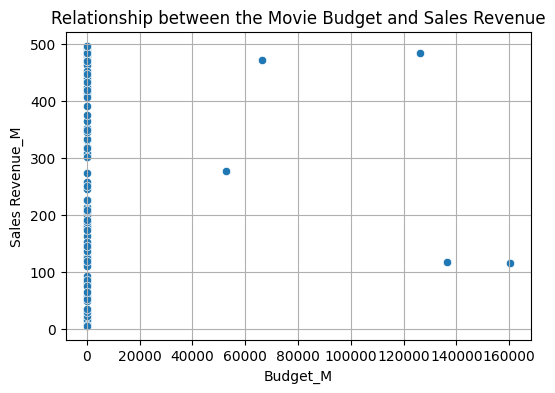

In [ ]:
## Relationship between Budget and Sales Revenue
plt.figure(figsize=(6,4))
sns.scatterplot(data=df, x='Budget_M',y='Sales Revenue_M')
plt.title('Relationship between the Movie Budget and Sales Revenue')
plt.xlabel('Budget_M')
plt.ylabel('Sales Revenue_M')
plt.grid(True)
plt.show()

In [ ]:
correlation_matrix=df['Budget_M'].corr(df['Sales Revenue_M'])
print(f"Correlation coefficient between Budget and Sales Revenue: {correlation_matrix}")

Correlation coefficient between Budget and Sales Revenue: 0.030308853749523895


# **Q8:Pairwise Comparison**

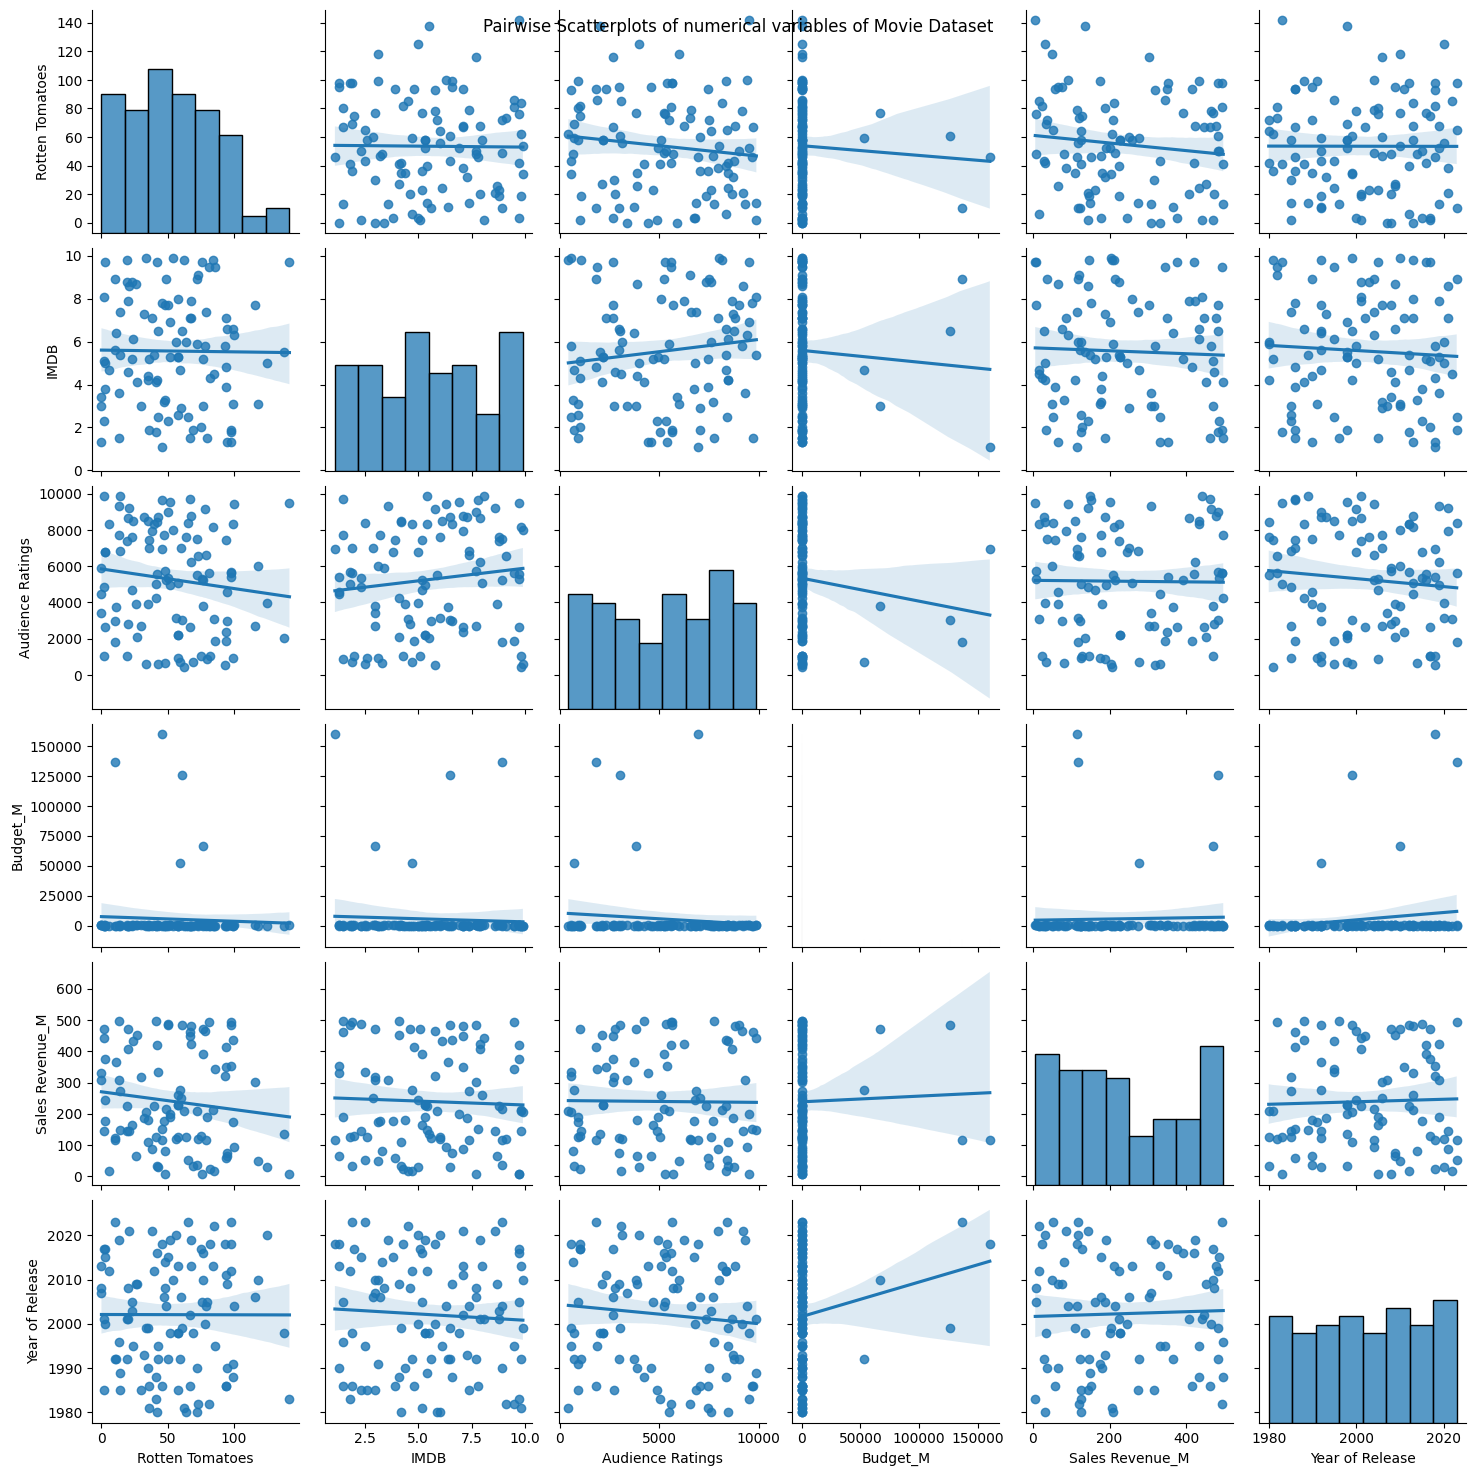

In [ ]:
sns.pairplot(df.select_dtypes(include=['number']), kind='reg')
plt.suptitle("Pairwise Scatterplots of numerical variables of Movie Dataset")
plt.show()

#**Q9: Misssing Values Investigation**

In [ ]:
### Extent of incompleteness in terms of missing values and attributes
missing_data= df.isnull().sum()
print("Missing data:\n", missing_data)

Missing data:
 Genre               0
Rotten Tomatoes     0
IMDB                0
Audience Ratings    0
Budget_M            0
Sales Revenue_M     5
Year of Release     0
dtype: int64


# **Q10: Noisy Data Analysis**

In [ ]:
### Check for Invalid Entries for numerical columns
invalid_entries=df[df.select_dtypes(include=['number'])<0].count()
print("Invalid Entries:\n", invalid_entries)

Invalid Entries:
 Genre               0
Rotten Tomatoes     0
IMDB                0
Audience Ratings    0
Budget_M            0
Sales Revenue_M     0
Year of Release     0
dtype: int64


# **Q11: Data Deduplication**

In [ ]:
### Finding duplicates
duplicates=df.duplicated().sum()
print("Number of Duplicate Records:", duplicates)


Number of Duplicate Records: 1


In [ ]:
### Remove the Duplicates
## Removing the duplicate will lead you to making more accurate statistical analysis
df=df.drop_duplicates()